In [1]:
import pandas as pd
import numpy as np

Showing data and limiting the countries to only UK

In [2]:
data_con = pd.read_csv('confirmed_pivot.csv')
data_dead = pd.read_csv('deaths_pivot.csv')

Data from UK only

In [3]:
not_uk = data_con['country'].unique() # getting all the unique country names
for i in range(len(not_uk)):
    if not_uk[i] == 'United Kingdom':
        not_uk = np.delete(not_uk, [i])
        break

for i in range(len(not_uk)):
    data_con = data_con[data_con.country != not_uk[i]]
    data_dead = data_dead[data_dead.country != not_uk[i]]

data_con = data_con.reset_index(drop=True)
data_dead = data_dead.reset_index(drop=True) 

In [4]:
data_con.head()

,country,date,total
0,United Kingdom,01/01/2021,2549693
1,United Kingdom,10/01/2021,3081372
2,United Kingdom,11/01/2021,3127647
3,United Kingdom,12/01/2021,3173295
4,United Kingdom,13/01/2021,3220957


In [5]:
data_dead.head()

,country,date,total
0,United Kingdom,2021-01-01,74237
1,United Kingdom,2021-01-10,81567
2,United Kingdom,2021-01-11,82096
3,United Kingdom,2021-01-12,83342
4,United Kingdom,2021-01-13,84910


sorting dataframe by date

In [6]:
data_con['year'] = ""
data_con['month'] = ""
data_con['day'] = ""
data_con['year-month'] = ""
data_con['year-month-day'] = ""

data_dead['year'] = ""
data_dead['month'] = ""
data_dead['day'] = ""
data_dead['year-month'] = ""
data_dead['year-month-day'] = ""

In [7]:
for i in range(len(data_con)):
    day,month,year = data_con['date'][i].split('/')
    data_con['year'][i] = year
    data_con['month'][i] = month
    data_con['day'][i] = day
    data_con['year-month'][i] = year+'/'+month
    data_con['year-month-day'][i] = year+'/'+month+'/'+day

for i in range(len(data_dead)):
    year,month,day = data_dead['date'][i].split('-')
    data_dead['year'][i] = year
    data_dead['month'][i] = month
    data_dead['day'][i] = day
    data_dead['year-month'][i] = year+'/'+month
    data_dead['year-month-day'][i] = year+'/'+month+'/'+day

<ipython-input-7-5e1c269b7bb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['year'][i] = year
<ipython-input-7-5e1c269b7bb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['month'][i] = month
<ipython-input-7-5e1c269b7bb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con['day'][i] = day
<ipython-input-7-5e1c269b7bb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [8]:
data_con.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,01/01/2021,2549693,2021,01,01,2021/01,2021/01/01
1,United Kingdom,10/01/2021,3081372,2021,01,10,2021/01,2021/01/10
2,United Kingdom,11/01/2021,3127647,2021,01,11,2021/01,2021/01/11
3,United Kingdom,12/01/2021,3173295,2021,01,12,2021/01,2021/01/12
4,United Kingdom,13/01/2021,3220957,2021,01,13,2021/01,2021/01/13


In [9]:
data_dead.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,2021-01-01,74237,2021,01,01,2021/01,2021/01/01
1,United Kingdom,2021-01-10,81567,2021,01,10,2021/01,2021/01/10
2,United Kingdom,2021-01-11,82096,2021,01,11,2021/01,2021/01/11
3,United Kingdom,2021-01-12,83342,2021,01,12,2021/01,2021/01/12
4,United Kingdom,2021-01-13,84910,2021,01,13,2021/01,2021/01/13


In [10]:
data_con = data_con.sort_values(by='year-month-day')
data_con = data_con.reset_index(drop=True)

data_dead = data_dead.sort_values(by='year-month-day')
data_dead = data_dead.reset_index(drop=True)

In [11]:
data_con.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,22/01/2020,0,2020,01,22,2020/01,2020/01/22
1,United Kingdom,23/01/2020,0,2020,01,23,2020/01,2020/01/23
2,United Kingdom,24/01/2020,0,2020,01,24,2020/01,2020/01/24
3,United Kingdom,25/01/2020,0,2020,01,25,2020/01,2020/01/25
4,United Kingdom,26/01/2020,0,2020,01,26,2020/01,2020/01/26


In [12]:
data_dead = data_dead.loc[0:(len(data_con)-1)]
data_dead.head()

,country,date,total,year,month,day,year-month,year-month-day
0,United Kingdom,2020-01-22,0,2020,01,22,2020/01,2020/01/22
1,United Kingdom,2020-01-23,0,2020,01,23,2020/01,2020/01/23
2,United Kingdom,2020-01-24,0,2020,01,24,2020/01,2020/01/24
3,United Kingdom,2020-01-25,0,2020,01,25,2020/01,2020/01/25
4,United Kingdom,2020-01-26,0,2020,01,26,2020/01,2020/01/26


In [13]:
monthly_con = data_con.groupby('year-month')['total'].max().reset_index()
monthly_dead = data_dead.groupby('year-month')['total'].max().reset_index()

In [14]:
monthly_con

,year-month,total
0,2020/01,2
1,2020/02,61
2,2020/03,38815
3,2020/04,178771
4,2020/05,257539
5,2020/06,285216
6,2020/07,304793
7,2020/08,338083
8,2020/09,455848
9,2020/10,1014795


In [15]:
monthly_dead

,year-month,total
0,2020/01,0
1,2020/02,0
2,2020/03,2457
3,2020/04,26754
4,2020/05,37527
5,2020/06,40479
6,2020/07,41274
7,2020/08,41589
8,2020/09,42233
9,2020/10,46645


In [16]:
# Removing row of 2021/03 (incomplete data)
monthly_con = monthly_con.drop([len(monthly_con)-1])
monthly_dead = monthly_dead.drop([len(monthly_dead)-1])
monthly_con

,year-month,total
0,2020/01,2
1,2020/02,61
2,2020/03,38815
3,2020/04,178771
4,2020/05,257539
5,2020/06,285216
6,2020/07,304793
7,2020/08,338083
8,2020/09,455848
9,2020/10,1014795


In [17]:
monthly_con = monthly_con.set_index('year-month')
monthly_dead = monthly_dead.set_index('year-month')

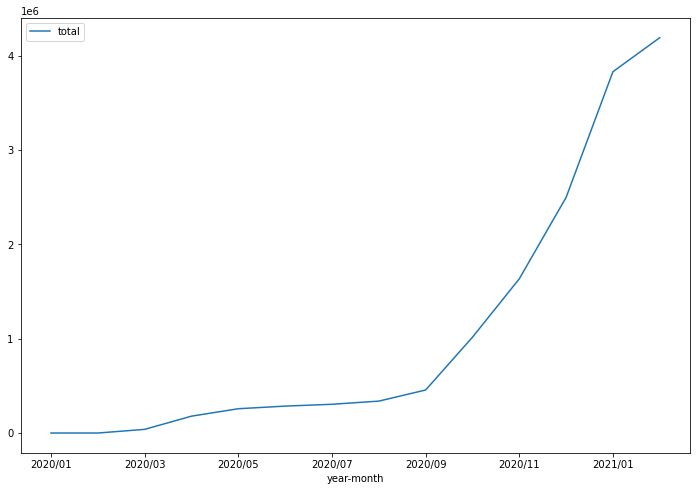

In [18]:
monthly_con.plot(figsize=(12,8))

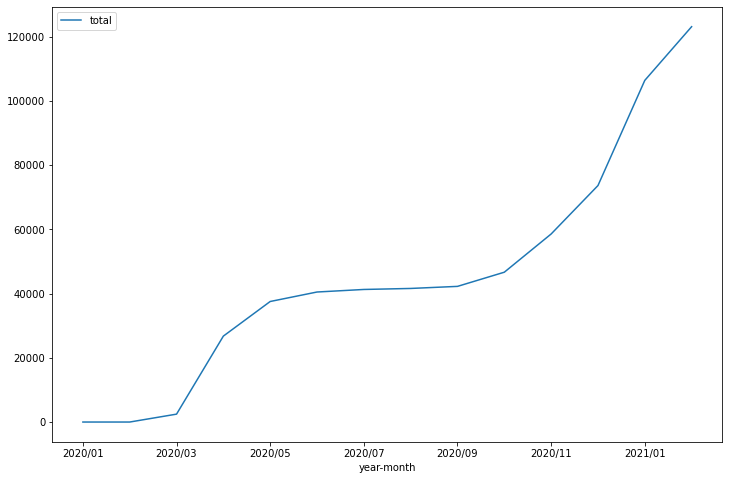

In [19]:
monthly_dead.plot(figsize=(12,8))

In [20]:
monthly_case = monthly_con.copy()

for i in range(len(monthly_case)):
    monthly_case['total'][i] = monthly_con['total'][i] - monthly_dead['total'][i]

monthly_case

,total
year-month,
2020/01,2
2020/02,61
2020/03,36358
2020/04,152017
2020/05,220012
2020/06,244737
2020/07,263519
2020/08,296494
2020/09,413615


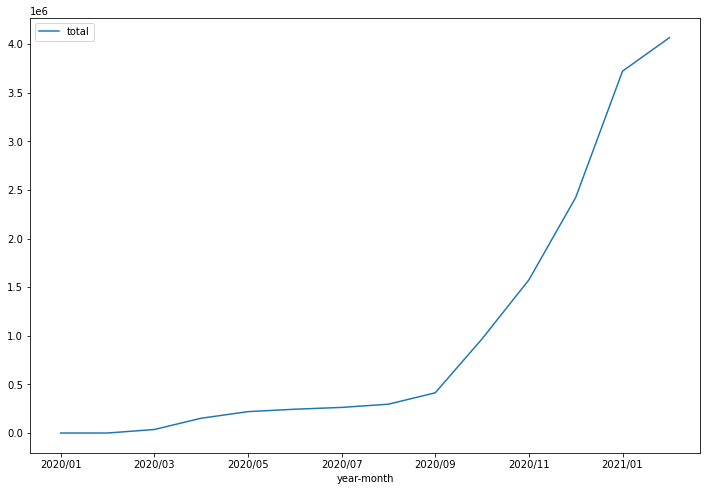

In [21]:
monthly_case.plot(figsize=(12,8))

In [22]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(monthly_con['total'])

In [23]:
#Ho: non-stationary
#H1: stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','# of Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [24]:
adfuller_test(monthly_con['total'])

ADF Test Statistic : 1.3368184511562509
p-value : 0.9968073346737755
# of Lags Used : 5
Number of Observations Used : 8
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing

In [25]:
monthly_con['Monthly Difference'] = monthly_con['total'] - monthly_con['total'].shift(1)

In [26]:
monthly_con

,total,Monthly Difference
year-month,,
2020/01,2,NaN
2020/02,61,59.0
2020/03,38815,38754.0
2020/04,178771,139956.0
2020/05,257539,78768.0
2020/06,285216,27677.0
2020/07,304793,19577.0
2020/08,338083,33290.0
2020/09,455848,117765.0


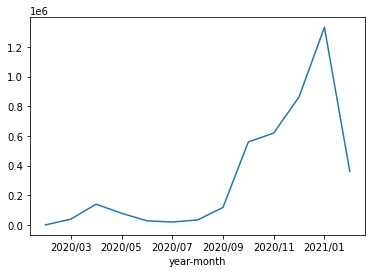

In [27]:
monthly_con['Monthly Difference'].plot()

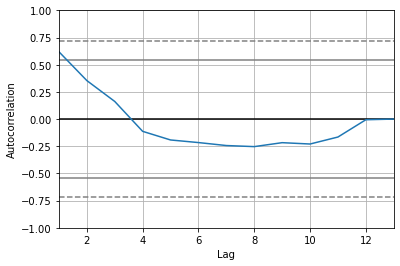

In [28]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

autocorrelation_plot(monthly_con['Monthly Difference'].dropna())
plt.show()

ARIMA for non-seasonal data (?)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(monthly_con['Monthly Difference'].dropna(), order=(1,1,1))
model_fit = model.fit()

E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Coding\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     Monthly Difference   No. Observations:                   13
Model:                     ARMA(0, 3)   Log Likelihood                -181.818
Method:                       css-mle   S.D. of innovations         234713.170
Date:                Thu, 18 Mar 2021   AIC                            373.636
Time:                        20:26:39   BIC                            376.461
Sample:                    02-01-2020   HQIC                           373.055
                         - 02-01-2021                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.347e+05   2.38e+05      0.566      0.571   -3.32e+05    6.01e+05
ma.L1.Monthly Difference     0.6253      0.541      1.156      0.248      -0.435       1.686
ma.L2.Monthly Difference     0.6253      0.650      0.962      0.336      -0.649       1.899
ma.L3.Monthly Difference     1.0000      0.780      1.282      0.200      -0.529       2.529
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.1873           -0.9823j            1.0000           -0.2200
MA.3            0.1873           +0.9823j            1.0000            0.2200
-----------------------------------------------------------------------------
"""

???????????

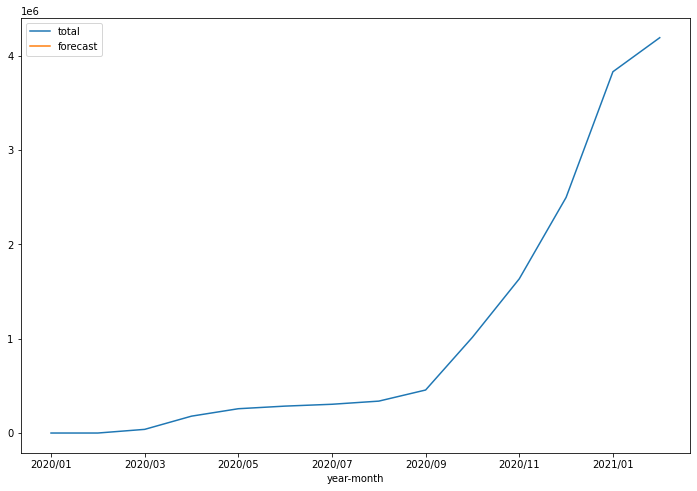

In [31]:
monthly_con['forecast'] = model_fit.predict(start=9,end=11,dynamic=True)
monthly_con[['total','forecast']].plot(figsize=(12,8))

In [32]:
monthly_con

,total,Monthly Difference,forecast
year-month,,,
2020/01,2,NaN,NaN
2020/02,61,59.0,NaN
2020/03,38815,38754.0,NaN
2020/04,178771,139956.0,NaN
2020/05,257539,78768.0,NaN
2020/06,285216,27677.0,NaN
2020/07,304793,19577.0,NaN
2020/08,338083,33290.0,NaN
2020/09,455848,117765.0,NaN


Using SARIMAX

In [33]:
 import statsmodels.api as sm

 model = sm.tsa.statespace.SARIMAX(monthly_con['total'],order=(0,0,3),seasonal_order=(0,0,3,12))
 result = model.fit()

E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Coding\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


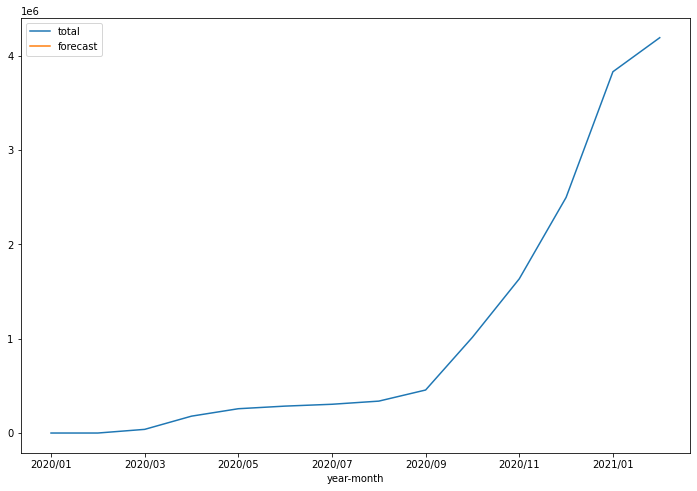

In [34]:
monthly_con['forecast'] = result.predict(start=9,end=11,dynamic=True)
monthly_con[['total','forecast']].plot(figsize=(12,8))

In [35]:
monthly_con

,total,Monthly Difference,forecast
year-month,,,
2020/01,2,NaN,NaN
2020/02,61,59.0,NaN
2020/03,38815,38754.0,NaN
2020/04,178771,139956.0,NaN
2020/05,257539,78768.0,NaN
2020/06,285216,27677.0,NaN
2020/07,304793,19577.0,NaN
2020/08,338083,33290.0,NaN
2020/09,455848,117765.0,NaN
